# Preprocesado de datos de la web de hoteles Expedia



## Importamos las librerías necesarias

In [ ]:
import numpy as np 
import pandas as pd

import os

import pandas as pd
import boto3
from io import StringIO
import io
import string
import random
import json
import pickle
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm

### Dataset

Datos relativos a 2013-2014

In [ ]:
data = pd.read_csv('train.csv', nrows=100000)

data.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [ ]:
data.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_time                  100000 non-null  object 
 1   site_name                  100000 non-null  int64  
 2   posa_continent             100000 non-null  int64  
 3   user_location_country      100000 non-null  int64  
 4   user_location_region       100000 non-null  int64  
 5   user_location_city         100000 non-null  int64  
 6   orig_destination_distance  63078 non-null   float64
 7   user_id                    100000 non-null  int64  
 8   is_mobile                  100000 non-null  int64  
 9   is_package                 100000 non-null  int64  
 10  channel                    100000 non-null  int64  
 11  srch_ci                    99929 non-null   object 
 12  srch_co                    99929 non-null   object 
 13  srch_adults_cnt            100

#### Variables

|  Variable |  Descripción | 
|----------|:---------|
| date_time  | Timestamp     |
| site_name | ID del punto de venta de Expedia|
| posa_continent | ID del continente del site |
| user_location_country |ID del país del cliente |
| user_location_region|ID de la región del cliente|
| user_location_city| ID of la ciudad del cliente|
| orig_destination_distance| Distancia física entre un hotel y el cliente|
| user_id| ID of usuario|
| is_mobile| 1 para dispositivos móviles, 0 en otro caso|
| is_package| 1 si la reserva es parte de un paquete, 0 en otro caso|
| channel| ID del canal de marketing|
| srch_ci| Fecha de check-in|
| srch_co|Fecha de heck-out|
| srch_adults_cnt| Número de adultos|
| srch_children_cnt| Número de niños|
| srch_rm_cnt| Número de habitaciones|
| srch_destination_id| ID del destino|
| srch_destination_type_id| Tipo de destino|
| is_booking | 1 si se reserva, 0 si se hace click|
| cnt| Número de eventos similares en la misma sesión de usuario|
| hotel_continent| Continente del hotel|
| hotel_country| País del hotely|
| hotel_market| Mercado del hotel|
| hotel_cluster| ID del cluster del hotel|


### Comprobamos el porcentaje de NA que hay en el dataset

In [ ]:

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/len(data)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Porcentaje'])
missing_data.head(20)

,Total,Porcentaje
orig_destination_distance,36922,0.36922
srch_ci,71,0.00071
srch_co,71,0.00071
channel,0,0.00000
site_name,0,0.00000
posa_continent,0,0.00000
user_location_country,0,0.00000
user_location_region,0,0.00000
user_location_city,0,0.00000
user_id,0,0.00000


### Convertimos a fecha las variables que lo sean de nuestro set de datos:

- date_time
- srch_ci
- srch_co




### Además, generamos nuevas variables a partir de ellas, que sirvan como input a futuros modelos

- stay_dur: duración de la estancia
- no_of_days_bet_booking: número de días entre la reserva y la estancia 
- Cin_day: día del check in
- Cin_month: mes del check in
- Cin_year: año del check-in

In [ ]:
# Function to convert date object into relevant attributes
def convert_date_into_days(df):
    df['srch_ci'] = pd.to_datetime(df['srch_ci'])
    df['srch_co'] = pd.to_datetime(df['srch_co'])
    df['date_time'] = pd.to_datetime(df['date_time'])
    
    df['stay_dur'] = (df['srch_co'] - df['srch_ci']).astype('timedelta64[D]')
    df['no_of_days_bet_booking'] = (df['srch_ci'] - df['date_time']).astype('timedelta64[D]')
    
    df['Cin_day'] = df["srch_ci"].apply(lambda x: x.day)
    df['Cin_month'] = df["srch_ci"].apply(lambda x: x.month)
    df['Cin_year'] = df["srch_ci"].apply(lambda x: x.year)
    return df

In [ ]:
data = convert_date_into_days(data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date_time                  100000 non-null  datetime64[ns]
 1   site_name                  100000 non-null  int64         
 2   posa_continent             100000 non-null  int64         
 3   user_location_country      100000 non-null  int64         
 4   user_location_region       100000 non-null  int64         
 5   user_location_city         100000 non-null  int64         
 6   orig_destination_distance  63078 non-null   float64       
 7   user_id                    100000 non-null  int64         
 8   is_mobile                  100000 non-null  int64         
 9   is_package                 100000 non-null  int64         
 10  channel                    100000 non-null  int64         
 11  srch_ci                    99929 non-null   datetime6

In [ ]:
## Número de reservas por año

cin_year = data.Cin_year.value_counts()               
cin_year

2014.0    63962
2013.0    24586
2015.0    11380
2016.0        1
Name: Cin_year, dtype: int64

In [ ]:
## Número de reservas por mes

cin_month = data.Cin_month.value_counts()               
cin_month

12.0    12359
8.0     11784
7.0      9481
10.0     9326
11.0     8800
9.0      8352
5.0      7674
3.0      7172
6.0      7007
4.0      6860
1.0      6454
2.0      4660
Name: Cin_month, dtype: int64

In [ ]:
## Número de reservas por día

cin_days = data.Cin_day.value_counts()    

cin_days

26.0    3741
27.0    3653
1.0     3610
20.0    3597
28.0    3576
29.0    3499
24.0    3457
17.0    3424
22.0    3422
25.0    3395
5.0     3356
23.0    3344
3.0     3332
19.0    3322
11.0    3290
21.0    3284
30.0    3202
13.0    3172
9.0     3148
4.0     3139
15.0    3100
18.0    3091
12.0    3090
8.0     3055
14.0    3046
10.0    2990
7.0     2930
2.0     2869
6.0     2855
16.0    2779
31.0    2161
Name: Cin_day, dtype: int64

In [ ]:
## Número de reservas por duración de la estancia

stay_dur = data.stay_dur.value_counts()           
stay_dur

 1.0      27058
 2.0      20007
 3.0      17275
 4.0      11679
 5.0       6711
 7.0       5821
 6.0       4517
 8.0       1820
 9.0       1028
 10.0       931
 14.0       770
 11.0       526
 0.0        432
 12.0       412
 13.0       339
 15.0       127
 21.0        74
 20.0        68
 17.0        66
 16.0        57
 19.0        51
 28.0        25
 22.0        17
 26.0        15
 18.0        15
 30.0        13
 31.0        12
 27.0        12
 25.0         9
 29.0         5
 32.0         4
 34.0         4
 24.0         3
 23.0         3
 35.0         3
 48.0         2
 33.0         2
 41.0         2
 62.0         2
-56.0         2
 183.0        2
-234.0        1
 42.0         1
 190.0        1
 57.0         1
 39.0         1
 44.0         1
 36.0         1
 37.0         1
Name: stay_dur, dtype: int64

### Volvemos a comprobar NA y rellenamos con aquellos valores que son más frecuentes

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/len(data)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Porcentaje'])
missing_data.head(20)

,Total,Porcentaje
orig_destination_distance,36922,0.36922
Cin_year,71,0.00071
srch_ci,71,0.00071
Cin_month,71,0.00071
srch_co,71,0.00071
stay_dur,71,0.00071
no_of_days_bet_booking,71,0.00071
Cin_day,71,0.00071
site_name,0,0.00000
posa_continent,0,0.00000


In [ ]:
data['Cin_day'] = data['Cin_day'].fillna(cin_days.index[0])
data['Cin_month'] = data['Cin_month'].fillna(cin_month.index[0])
data['Cin_year'] = data['Cin_year'].fillna(cin_year.index[0])
data['stay_dur'] = data['stay_dur'].fillna(stay_dur.index[0])
data['no_of_days_bet_booking'] = data['no_of_days_bet_booking'].fillna(0.0)

In [ ]:
# Rellenar los NA en la vriable distancia entre el origen y destino, con la media

data['orig_destination_distance'].fillna(data['orig_destination_distance'].mean(), inplace=True)

In [ ]:
data.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,stay_dur,no_of_days_bet_booking,Cin_day,Cin_month,Cin_year
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,3,2,50,628,1,4.0,15.0,27.0,8.0,2014.0
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,1,2,50,628,1,4.0,17.0,29.0,8.0,2014.0
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,1,2,50,628,1,4.0,17.0,29.0,8.0,2014.0
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,1,2,50,1457,80,5.0,105.0,23.0,11.0,2014.0
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,1,2,50,1457,21,5.0,105.0,23.0,11.0,2014.0


### Realmente, tendríamos que haber borrado los registros que no habían acabado en reserva

In [ ]:
data = data[data.is_booking != 0]

### Vemos si hay outliers

In [ ]:
data.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster', 'stay_dur', 'no_of_days_bet_booking', 'Cin_day',
       'Cin_month', 'Cin_year'],
      dtype='object')

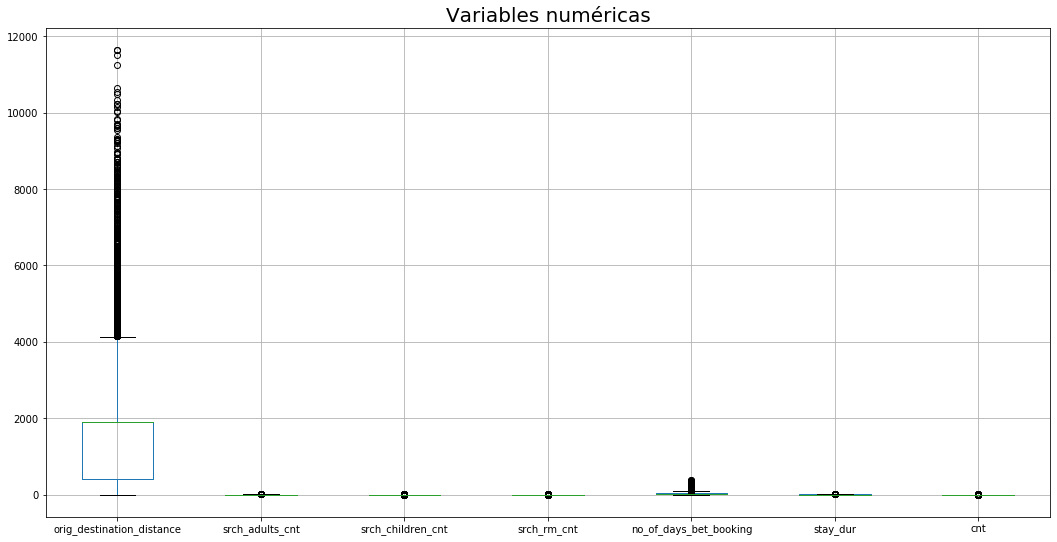

In [ ]:
num_cols = ['orig_destination_distance', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'no_of_days_bet_booking', 'stay_dur', 'cnt']
plt.figure(figsize=(18,9))
data[num_cols].boxplot()
plt.title("Variables numéricas", fontsize=20)
plt.show()

#### Vemos que la variable distancia entre origen y destino tiene bastante valores anómalos. 

In [ ]:
data[data.orig_destination_distance > 4000]

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,stay_dur,no_of_days_bet_booking,Cin_day,Cin_month,Cin_year
128,2014-10-29 14:32:19,2,3,66,174,40365,8456.8294,1713,0,0,...,1,3,5,89,38,1.0,12.0,11.0,11.0,2014.0
133,2014-12-05 09:58:15,2,3,66,174,21855,8393.1607,1713,0,0,...,1,3,5,89,81,1.0,5.0,11.0,12.0,2014.0
774,2013-11-20 12:03:02,13,1,46,171,15334,5655.3159,4539,0,0,...,2,2,50,628,1,2.0,252.0,31.0,7.0,2014.0
776,2013-11-21 11:15:09,13,1,46,171,19639,5761.2438,4539,0,0,...,2,2,50,1230,91,3.0,270.0,19.0,8.0,2014.0
787,2014-03-14 11:32:05,13,1,46,171,16896,5869.8608,4539,0,0,...,1,2,50,365,72,3.0,157.0,19.0,8.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99376,2013-11-11 21:06:24,2,3,66,363,51253,7862.6880,388180,0,0,...,1,3,99,1312,67,2.0,1.0,13.0,11.0,2013.0
99387,2014-02-23 13:40:11,2,3,66,363,11295,7864.3449,388180,0,0,...,1,3,99,1312,67,2.0,3.0,27.0,2.0,2014.0
99419,2014-04-09 13:31:21,2,3,66,363,12346,8055.6668,388180,0,0,...,1,3,99,1033,38,4.0,12.0,22.0,4.0,2014.0
99425,2014-04-15 08:39:25,2,3,66,363,12346,7559.5896,388180,0,0,...,1,3,99,1225,36,2.0,4.0,20.0,4.0,2014.0


#### Además, debido a la diferencia de magnitud con las otras variables, no podemos ver bien si hay outliers en el resto de campos. Vamos a separarlos

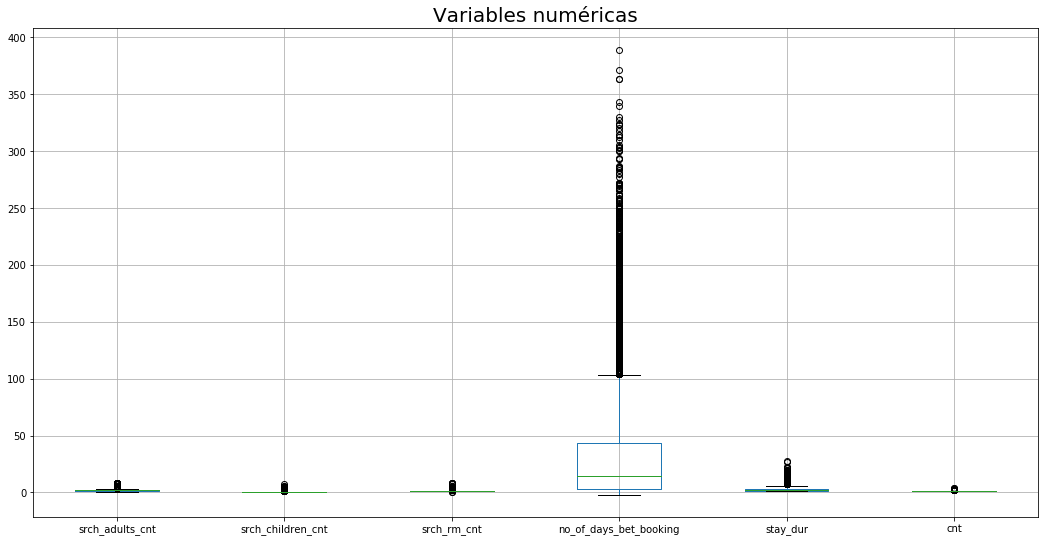

In [ ]:
num_cols = ['srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'no_of_days_bet_booking', 'stay_dur', 'cnt']

plt.figure(figsize=(18,9))
data[num_cols].boxplot()
plt.title("Variables numéricas", fontsize=20)
plt.show()

In [ ]:
data[data.no_of_days_bet_booking > 100].orig_destination_distance.mean()

2353.680148086068

In [ ]:
data[data.no_of_days_bet_booking > 100].orig_destination_distance.median()

1897.6091611353784